In [9]:
import cv2
import os
import uuid
import time

# Define the path
IMAGES_PATH = os.path.join('data', 'images')

# ✅ Ensure the folder exists before saving images
os.makedirs(IMAGES_PATH, exist_ok=True)

number_images = 30
cap = cv2.VideoCapture(0)  # Change index if needed (try 1 if 0 doesn't work)

for imgnum in range(number_images):
    print(f'Collecting image {imgnum}')
    ret, frame = cap.read()

    if not ret:
        print("Error: Could not read frame.")
        continue  # Skip saving if frame capture failed

    imgname = os.path.join(IMAGES_PATH, f"{uuid.uuid1()}.jpg")
    
    # ✅ Print file path for debugging
    print(f"Saving image to: {imgname}")

    success = cv2.imwrite(imgname, frame)
    if not success:
        print("Error: Could not save image.")

    cv2.imshow('frame', frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


Saving image to: data\images\672ab8c6-0c84-11f0-83b3-b372283d65f4.jpg
Saving image to: data\images\677f2e6c-0c84-11f0-aa78-b372283d65f4.jpg
Saving image to: data\images\67ced44e-0c84-11f0-b303-b372283d65f4.jpg
Saving image to: data\images\681d7e2f-0c84-11f0-bfa5-b372283d65f4.jpg
Saving image to: data\images\686be48d-0c84-11f0-abb7-b372283d65f4.jpg
Saving image to: data\images\68ba95ff-0c84-11f0-846c-b372283d65f4.jpg
Saving image to: data\images\690a06b6-0c84-11f0-b322-b372283d65f4.jpg
Saving image to: data\images\69584775-0c84-11f0-92bb-b372283d65f4.jpg
Saving image to: data\images\69a6f292-0c84-11f0-8b7c-b372283d65f4.jpg
Saving image to: data\images\69f600d9-0c84-11f0-bd33-b372283d65f4.jpg
Saving image to: data\images\6a44eef6-0c84-11f0-b489-b372283d65f4.jpg
Saving image to: data\images\6a93d113-0c84-11f0-9835-b372283d65f4.jpg
Saving image to: data\images\6ae2c56f-0c84-11f0-8be9-b372283d65f4.jpg
Saving image to: data\images\6b31872e-0c84-11f0-a912-b372283d65f4.jpg
Saving image to: dat

In [10]:
!labelme

2025-03-29 15:29:10.264 | INFO     | labelme.config:get_config:66 - Loading config file from: C:\Users\Nikunj\.labelmerc


In [8]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [14]:
images = tf.data.Dataset.list_files('data\\images\\*.jpg')

In [15]:
images.as_numpy_iterator().next()

b'data\\images\\c8424230-0c82-11f0-a096-b372283d65f4.jpg'

In [11]:
def load_image(x): 
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [17]:
images = images.map(load_image)

In [18]:
images.as_numpy_iterator().next()

array([[[253, 255, 254],
        [253, 255, 254],
        [253, 255, 254],
        ...,
        [ 15,  17,  14],
        [ 15,  17,  14],
        [ 18,  20,  17]],

       [[253, 255, 254],
        [253, 255, 254],
        [253, 255, 254],
        ...,
        [ 15,  17,  14],
        [ 15,  17,  14],
        [ 17,  19,  16]],

       [[253, 255, 254],
        [253, 255, 254],
        [253, 255, 254],
        ...,
        [ 15,  17,  14],
        [ 14,  16,  13],
        [ 15,  17,  14]],

       ...,

       [[133, 125, 112],
        [133, 125, 112],
        [133, 125, 112],
        ...,
        [137, 133, 130],
        [137, 133, 130],
        [137, 133, 130]],

       [[133, 126, 110],
        [133, 126, 110],
        [133, 125, 112],
        ...,
        [137, 133, 130],
        [137, 133, 130],
        [137, 133, 130]],

       [[131, 124, 108],
        [131, 124, 108],
        [131, 123, 110],
        ...,
        [136, 132, 129],
        [136, 132, 129],
        [137, 133, 130]]

In [19]:
type(images)

tensorflow.python.data.ops.dataset_ops.MapDataset

In [20]:
image_generator = images.batch(4).as_numpy_iterator()

In [21]:
plot_images = image_generator.next()

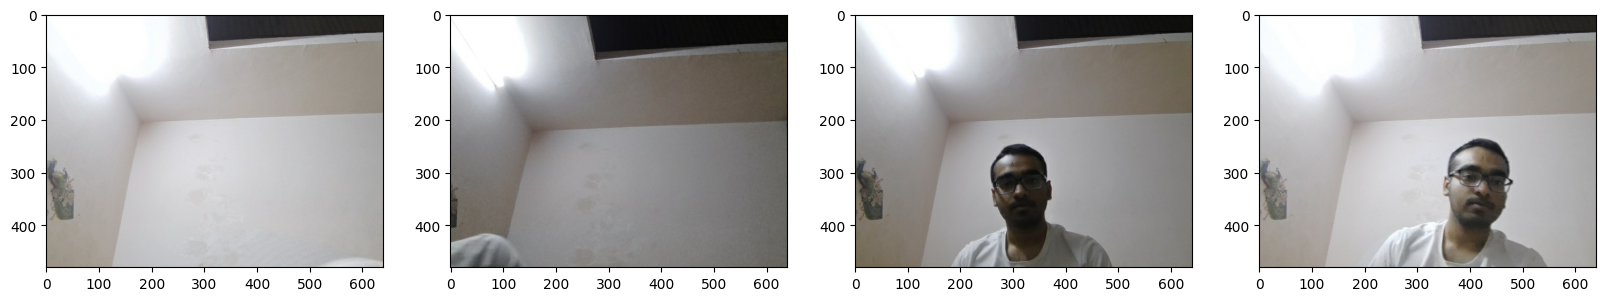

In [22]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image) 
plt.show()

In [32]:
import os
import shutil
import random

# Paths
IMAGE_DIR = os.path.join('data', 'images')
LABEL_DIR = os.path.join('data', 'labels')
OUTPUT_DIR = 'data'

# Train-Test-Val split ratios
train_ratio, test_ratio, val_ratio = 0.7, 0.15, 0.15

# Create output directories if they don't exist
for split in ['train', 'test', 'val']:
    os.makedirs(os.path.join(OUTPUT_DIR, split, 'images'), exist_ok=True)
    os.makedirs(os.path.join(OUTPUT_DIR, split, 'labels'), exist_ok=True)

# Get all image files
images = [f for f in os.listdir(IMAGE_DIR) if f.endswith(('.jpg', '.png', '.jpeg'))]
random.shuffle(images)  # Shuffle for randomness

# Split dataset
train_size = int(len(images) * train_ratio)
test_size = int(len(images) * test_ratio)

train_files = images[:train_size]
test_files = images[train_size:train_size + test_size]
val_files = images[train_size + test_size:]

# Function to copy files
def copy_files(file_list, split):
    for file in file_list:
        # Copy image
        src_image = os.path.join(IMAGE_DIR, file)
        dest_image = os.path.join(OUTPUT_DIR, split, 'images', file)
        shutil.copy(src_image, dest_image)

        # Copy corresponding label
        label_file = file.rsplit('.', 1)[0] + '.json'  # Match JSON label
        src_label = os.path.join(LABEL_DIR, label_file)
        dest_label = os.path.join(OUTPUT_DIR, split, 'labels', label_file)

        if os.path.exists(src_label):
            shutil.copy(src_label, dest_label)
        else:
            print(f"⚠️ Label not found for: {file}")  # Warn if label is missing

# Copy files into respective folders
copy_files(train_files, 'train')
copy_files(test_files, 'test')
copy_files(val_files, 'val')

print("✅ Train-Test-Val Split Done! Files Copied.")


⚠️ Label not found for: 6bce58fe-0c84-11f0-a3d3-b372283d65f4.jpg
⚠️ Label not found for: cc91b25a-0c82-11f0-bf1d-b372283d65f4.jpg
⚠️ Label not found for: ccdefd52-0c82-11f0-8fc2-b372283d65f4.jpg
⚠️ Label not found for: 6b31872e-0c84-11f0-a912-b372283d65f4.jpg
⚠️ Label not found for: cd7cfbd9-0c82-11f0-9f88-b372283d65f4.jpg
⚠️ Label not found for: cd2e4bfd-0c82-11f0-be8a-b372283d65f4.jpg
⚠️ Label not found for: 6b801d37-0c84-11f0-8016-b372283d65f4.jpg
⚠️ Label not found for: cc42c249-0c82-11f0-8384-b372283d65f4.jpg
⚠️ Label not found for: 6ae2c56f-0c84-11f0-8be9-b372283d65f4.jpg
✅ Train-Test-Val Split Done! Files Copied.


In [7]:
import albumentations as alb

In [33]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))

In [37]:
img = cv2.imread(os.path.join('data','train', 'images','6a44eef6-0c84-11f0-b489-b372283d65f4.jpg'))

In [38]:
with open(os.path.join('data', 'train', 'labels', '6a44eef6-0c84-11f0-b489-b372283d65f4.json'), 'r') as f:
    label = json.load(f)

In [39]:
label['shapes'][0]['points']

[[245.83333333333331, 233.33333333333331],
 [378.61111111111114, 408.88888888888886]]

In [40]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [41]:
coords = list(np.divide(coords, [640,480,640,480]))
coords

[0.3841145833333333,
 0.48611111111111105,
 0.5915798611111112,
 0.8518518518518517]

In [42]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

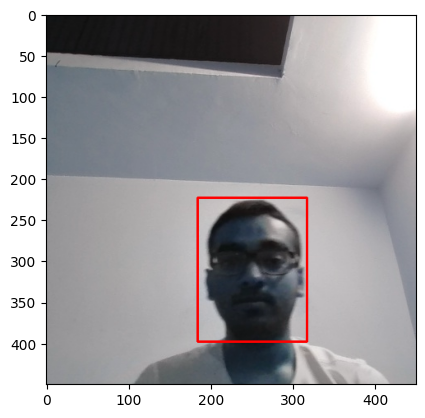

In [43]:
cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)), 
                    (255,0,0), 2)

plt.imshow(augmented['image'])

In [47]:
import os
import json
import cv2
import numpy as np

# Ensure augmented data directories exist
for partition in ['train', 'test', 'val']:
    os.makedirs(os.path.join('aug_data', partition, 'images'), exist_ok=True)
    os.makedirs(os.path.join('aug_data', partition, 'labels'), exist_ok=True)

# Define image dimensions for normalization
IMG_WIDTH, IMG_HEIGHT = 640, 480

for partition in ['train', 'test', 'val']: 
    for image_file in os.listdir(os.path.join('data', partition, 'images')):
        img_path = os.path.join('data', partition, 'images', image_file)
        img = cv2.imread(img_path)

        # Default bbox if no label exists
        coords = [0, 0, 0.00001, 0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{os.path.splitext(image_file)[0]}.json')

        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            try:
                x_min, y_min = label['shapes'][0]['points'][0]
                x_max, y_max = label['shapes'][0]['points'][1]

                # Ensure bbox is valid
                if x_max > x_min and y_max > y_min:
                    coords = [x_min, y_min, x_max, y_max]
                else:
                    print(f"Skipping invalid bbox in {label_path}: {coords}")
                    continue  # Skip this image

            except (IndexError, KeyError) as e:
                print(f"Error reading bbox from {label_path}: {e}")
                continue  # Skip this image

            # Normalize bbox
            coords = list(np.divide(coords, [IMG_WIDTH, IMG_HEIGHT, IMG_WIDTH, IMG_HEIGHT]))

        try:
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                aug_image_name = f'{os.path.splitext(image_file)[0]}.{x}.jpg'
                aug_label_name = f'{os.path.splitext(image_file)[0]}.{x}.json'

                cv2.imwrite(os.path.join('aug_data', partition, 'images', aug_image_name), augmented['image'])

                annotation = {"image": image_file}

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0:
                        annotation['bbox'] = [0, 0, 0, 0]
                        annotation['class'] = 0
                    else:
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else:
                    annotation['bbox'] = [0, 0, 0, 0]
                    annotation['class'] = 0

                with open(os.path.join('aug_data', partition, 'labels', aug_label_name), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(f"Error augmenting {image_file}: {e}")


Skipping invalid bbox in data\test\labels\6f2ec14c-0c84-11f0-9711-b372283d65f4.json: [0, 0, 1e-05, 1e-05]


In [9]:
import os
import json
import cv2
import numpy as np
import shutil
import random

In [12]:
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [13]:
test_images = tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [14]:
val_images = tf.data.Dataset.list_files('aug_data\\val\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [15]:
train_images.as_numpy_iterator().next()

array([[[0.7242034 , 0.7163603 , 0.72028184],
        [0.547549  , 0.5397059 , 0.54362744],
        [0.54356617, 0.53572303, 0.5396446 ],
        ...,
        [0.69215685, 0.6838235 , 0.6696078 ],
        [0.6854779 , 0.6668505 , 0.65067405],
        [0.6970588 , 0.6684436 , 0.6557598 ]],

       [[0.7601103 , 0.75753677, 0.75943625],
        [0.6552696 , 0.6474265 , 0.65134805],
        [0.5434436 , 0.5356005 , 0.53952205],
        ...,
        [0.7058211 , 0.6901348 , 0.6783701 ],
        [0.70490193, 0.68621325, 0.6714461 ],
        [0.70465684, 0.685049  , 0.66954654]],

       [[0.76096815, 0.76096815, 0.7658701 ],
        [0.7512255 , 0.7512255 , 0.7512255 ],
        [0.57420343, 0.57420343, 0.57420343],
        ...,
        [0.702451  , 0.6867647 , 0.675     ],
        [0.69558823, 0.67990196, 0.66813725],
        [0.7104167 , 0.69718134, 0.6805147 ]],

       ...,

       [[0.15582108, 0.15582108, 0.16366422],
        [0.14001225, 0.14001225, 0.14785539],
        [0.16850491, 0

In [16]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

In [17]:
train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [18]:
test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [19]:
val_labels = tf.data.Dataset.list_files('aug_data\\val\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [20]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.2029, 0.1543, 0.5176, 0.5913], dtype=float16))

In [21]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(2880, 2880, 540, 540, 540, 540)

In [51]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [52]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [53]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [50]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.0342 , 0.081  , 0.3896 , 0.534  ],
        [0.5146 , 0.1632 , 0.8296 , 0.573  ],
        [0.     , 0.     , 0.     , 0.     ],
        [0.328  , 0.1072 , 0.645  , 0.5083 ],
        [0.     , 0.     , 0.3464 , 0.3962 ],
        [0.2423 , 0.1487 , 0.5225 , 0.4956 ],
        [0.07446, 0.583  , 0.3584 , 0.9365 ],
        [0.4705 , 0.0978 , 0.769  , 0.5063 ]], dtype=float16))

In [54]:
data_samples = train.as_numpy_iterator()

In [55]:
res = data_samples.next()

In [56]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [43]:
vgg = VGG16(include_top=False)

58889256/58889256 [==============================] - 5s 0us/step


In [45]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [58]:
def build_model(): 
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

In [59]:
facetracker = build_model()

In [63]:
facetracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, None, None,   14714688    ['input_2[0][0]']                
                                512)                                                              
                                                                                                  
 global_max_pooling2d (GlobalMa  (None, 512)         0           ['vgg16[0][0]']                  
 xPooling2D)                                                                                  

In [64]:
X, y = train.as_numpy_iterator().next()

In [65]:
X.shape

(8, 120, 120, 3)

In [66]:
classes, coords = facetracker.predict(X)

1/1 [==============================] - 11s 11s/step


In [67]:
classes, coords

(array([[0.44166225],
        [0.43656114],
        [0.4889794 ],
        [0.42832556],
        [0.41026774],
        [0.45803416],
        [0.4260331 ],
        [0.45556188]], dtype=float32),
 array([[0.5021649 , 0.7013607 , 0.5795104 , 0.48617604],
        [0.41974092, 0.67717326, 0.5643699 , 0.46209818],
        [0.53427523, 0.6726096 , 0.5827035 , 0.52681476],
        [0.47647852, 0.59511805, 0.6174666 , 0.4889858 ],
        [0.3806049 , 0.6244874 , 0.54757506, 0.53056926],
        [0.52739215, 0.6186047 , 0.66363597, 0.5582088 ],
        [0.49277666, 0.6466189 , 0.5547481 , 0.4054896 ],
        [0.5144232 , 0.6105238 , 0.62232375, 0.52696127]], dtype=float32))

In [68]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [69]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=lr_decay)

In [70]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [71]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [72]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [73]:
model = FaceTracker(facetracker)

In [74]:
model.compile(opt, classloss, regressloss)

In [76]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [77]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
360/360 [==============================] - 35s 70ms/step - total_loss: 0.2099 - class_loss: 0.0352 - regress_loss: 0.1923 - val_total_loss: 0.0139 - val_class_loss: 8.9407e-07 - val_regress_loss: 0.0139
Epoch 2/10
360/360 [==============================] - 23s 52ms/step - total_loss: 0.0156 - class_loss: 1.8981e-04 - regress_loss: 0.0155 - val_total_loss: 0.0026 - val_class_loss: 6.9142e-06 - val_regress_loss: 0.0026
Epoch 3/10
360/360 [==============================] - 23s 52ms/step - total_loss: 0.0084 - class_loss: 5.6350e-05 - regress_loss: 0.0084 - val_total_loss: 0.0106 - val_class_loss: 6.2585e-07 - val_regress_loss: 0.0106
Epoch 4/10
360/360 [==============================] - 23s 52ms/step - total_loss: 0.0062 - class_loss: 4.2735e-05 - regress_loss: 0.0062 - val_total_loss: 0.0053 - val_class_loss: 2.2054e-06 - val_regress_loss: 0.0053
Epoch 5/10
360/360 [==============================] - 23s 52ms/step - total_loss: 0.0041 - class_loss: 2.0465e-05 - regress_loss: 0.

In [78]:
hist.history

{'total_loss': [0.21320420503616333,
  0.011481093242764473,
  0.006232591345906258,
  0.0034120865166187286,
  0.006624226924031973,
  0.002056446857750416,
  0.0008243930642493069,
  0.003165805246680975,
  0.0014718128368258476,
  0.0020470074377954006],
 'class_loss': [0.000407446816097945,
  3.0340799639816396e-05,
  3.633058804553002e-05,
  4.6575274609494954e-05,
  1.3560262232203968e-05,
  1.2472422895370983e-05,
  1.0766158084152266e-05,
  8.717269338376354e-06,
  8.374599019589368e-06,
  4.4107628127676435e-06],
 'regress_loss': [0.21300047636032104,
  0.011465922929346561,
  0.006214425899088383,
  0.0033887987956404686,
  0.006617446895688772,
  0.0020502107217907906,
  0.0008190099615603685,
  0.0031614466570317745,
  0.0014676254941150546,
  0.002044802065938711],
 'val_total_loss': [0.013889087364077568,
  0.00264269532635808,
  0.01060324627906084,
  0.005278540775179863,
  0.0016557191265746951,
  0.005899226758629084,
  0.0027165913488715887,
  0.007657173555344343,
 

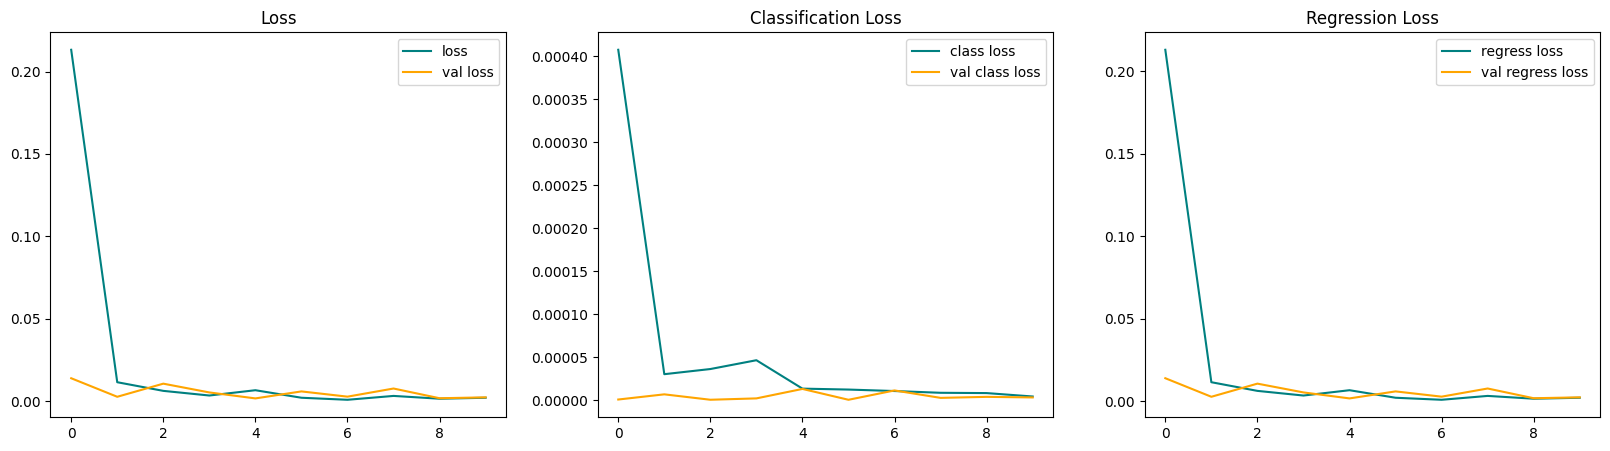

In [79]:


fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()



In [80]:
test_data = test.as_numpy_iterator()

In [81]:
test_sample = test_data.next()

In [82]:
yhat = facetracker.predict(test_sample[0])

1/1 [==============================] - 0s 36ms/step


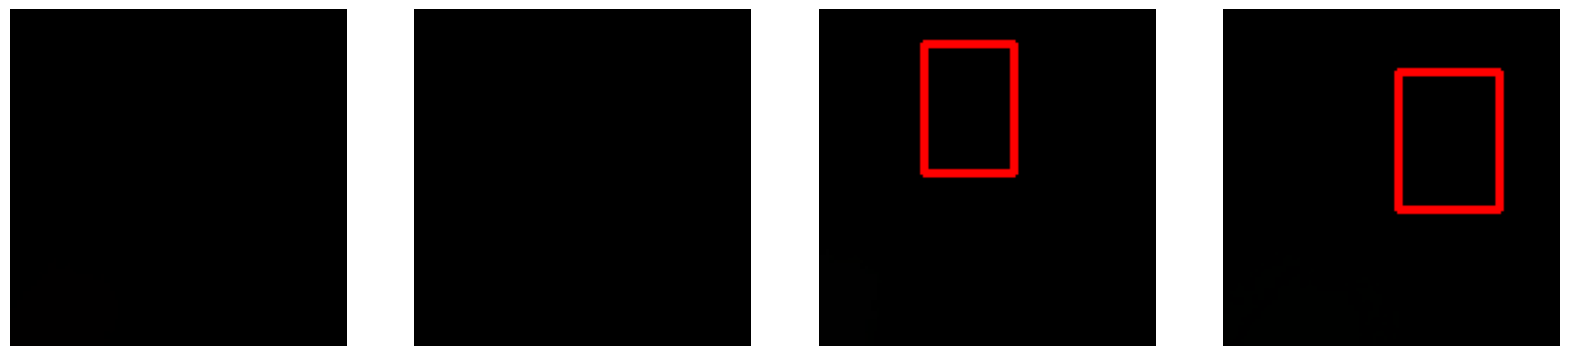

In [86]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

fig, ax = plt.subplots(ncols=4, figsize=(20, 20))

for idx in range(4): 
    # Ensure the image is writable by making a copy
    sample_image = np.array(test_sample[0][idx], dtype=np.uint8).copy()  

    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120, 120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120, 120]).astype(int)), 
                      (255, 0, 0), 2)
    
    ax[idx].imshow(sample_image)
    ax[idx].axis("off")  # Hide axis for better visualization

plt.show()


In [1]:
from tensorflow.keras.models import load_model

In [2]:
facetracker.save('facetracker.h5')

NameError: name 'facetracker' is not defined

In [3]:
facetracker = load_model('facetracker.h5')

In [ ]:
import os
import json
import cv2
import numpy as np

cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('EyeTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - ETA: 0s